In [1]:
import random
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

## Evolution function

In [2]:
def evolution(
    individual_template,
    population_size,
    fitness_function,
    maximize,
    selection_function,
    crossover_function,
    mutation_function,
    P_operations,
    P_mutation,
    P_crossover,
    number_of_iterations
    ):
    
    # generating the population from the templates
    population = [individual_template() for i in range(population_size)]
    
    # fitness array - index = index of the individual
    fitness = [fitness_function(i) for i in population]

    # iterating the generations
    for _ in range(number_of_iterations):
        new_generation = []
        # filling the new generation with altered individuals from the previous generation
        while len(new_generation) < len(population):
            p = random.random()
            new_individual = None
            if p < P_operations[0]:
                new_individual = selection_function(population, fitness_function, maximize)
            elif p > 1 - P_operations[2]:
                new_individual = mutation_function(population, P_mutation)
            else:
                new_individual = crossover_function(population, P_crossover)
            if new_individual:
                new_generation.append(new_individual)

        # calculate the new fitness
        fitness = [fitness_function(i) for i in new_generation]
    

        # outputting information about current generation
        if ((_  + 1) % 100 == 0):
            print(f"{_ + 1}. generation |\
        mean = {sum(fitness) / len(fitness)} |\
        {'max' if maximize else 'min'} = {max(fitness) if maximize else min(fitness)}")

        # switch old generation with the new generation
        population = new_generation
    return population
        


## Functions generating different individuals for the population

Purpose of these functions is to simply generate individuals for given evolution algorithm. Closures returning the function with given parameters. An individual is expected to be an array of elements - all individual arrays have the same length.

In [3]:
# binary array of length n
def binary_individual(bit_num):
    def binary_individual_func():
        return [random.randint(0, 1) for _ in range(bit_num)]
    return binary_individual_func

# integer array from a to b of length n
def integer_individual(n, a, b):
    def integer_individual_func():
        return [random.randint(a, b) for _ in range(n)]
    return integer_individual_func    

# float array from a to b of length n
def float_individual(float_num, a=0, b=1):
    def float_individual_func():
        return [random.random() * (b - a) + a for _ in range(float_num)]
    return float_individual_func

## Simple fitness functions

Fitness function expects an individual on input (an array of elements). It returns a single numerical value.

In [4]:
# sum of all properties
def fitness_sum(arr):
    return sum(arr)

# standard deviation
def fitness_sigma(arr):
    return statistics.stdev(arr)

### Fitness functions for terrain evaluation

In [5]:
def three_lake_not_extreme_terrain(arr):
    lakes = 0
    prev_underwater = None
    underwater = False
    extreme_penalty = 0
    prev = arr[0]
    for point in arr:
        prev_underwater = underwater
        underwater = True if point < 0.5 else False
        if underwater and not prev_underwater:
            lakes += 1
        # point between 0.3 and 0.7
        if abs(0.5 - point) > 0.4:
            extreme_penalty += 0.1
        elif abs(0.5 - point) > 0.2:
            extreme_penalty += 0.05
    return abs(3 - lakes) + extreme_penalty
        

In [6]:
def deep_lake_surrounded_by_mountains(arr):
    # TODO - uprostřed členité hluboké jezero a na stranách vysoké hory
    pass
    

## Simple selection functions

In [7]:
def tournament(batch_size):
    def tournament_func(population, fitness_function, maximize):
        arena = random.sample(population, batch_size)
        return max(arena, key=fitness_function) if maximize else min(arena, key=fitness_function)
    return tournament_func



## Crossover functions

In [8]:
def one_point_crossover(population, probability):
    couple = random.sample(population, 2)
    index = random.randint(0, len(couple[0]) - 1)
    if random.random() > 0.5:
        mutant = couple[0][0:index] + couple[1][index:]
    else:
        mutant = couple[1][index:] + couple[0][0:index]
    return mutant

## Mutation functions

Takes in two arguments - whole population and a probability of one value mutation. It also specifies, how the value will be altered.

In [9]:
def bit_mutation(population, probability):
    mutant = random.choice(population)
    for i in range(len(mutant)):
        if random.random() < probability:
            mutant[i] = 0 if mutant[i] == 1 else 1
    return mutant

def float_mutation(a, b):
    def float_mutation_func(population, probability):
        mutant = random.choice(population)
        for i in range(len(mutant)):
            if random.random() < probability:
                mutant[i] = random.random() * (b - a) + a
        return mutant
    return float_mutation_func
    

In [10]:
def display_terrain(arr):    
    # array of x values => x-axis
    x = np.arange(0, len(arr))
    
    # Function y=0.5 => water level
    y_half = np.full(len(arr), 0.5)    

    # filling water level
    plt.fill_between(x, y_half, 0, color='blue')

    # filling the surface
    plt.fill_between(x, arr, 0, color='orange')
    
    # plotting the line for values from array
    plt.plot(x, arr, color='black')
    
    # Set the y-axis limits to ensure the horizontal line is visible
    plt.ylim(0, 1)
    
    # Add title
    plt.title('Terrain')
    
    # Show the plot
    plt.show()

# Evolution call

In [17]:
individual_template = float_individual(float_num=15)
population_size = 20
fitness_function =  three_lake_not_extreme_terrain
maximize = False
selection_function = tournament(batch_size=2)
crossover_function = one_point_crossover
mutation_function = float_mutation(0, 1)
P_operations = (0.6, 0.3, 0.1)
P_mutation = 0.01
P_crossover = 0.95
number_of_iterations = 1

x = evolution(
    individual_template,
    population_size,
    fitness_function,
    maximize,
    selection_function,
    crossover_function,
    mutation_function,
    P_operations,
    P_mutation,
    P_crossover,
    number_of_iterations
    )

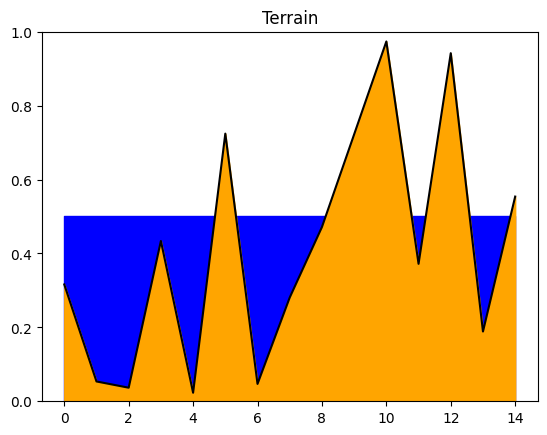

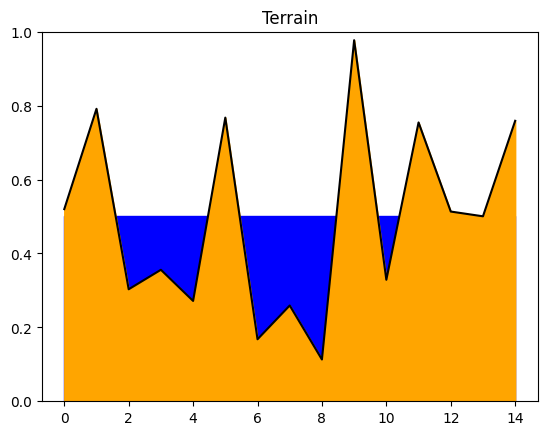

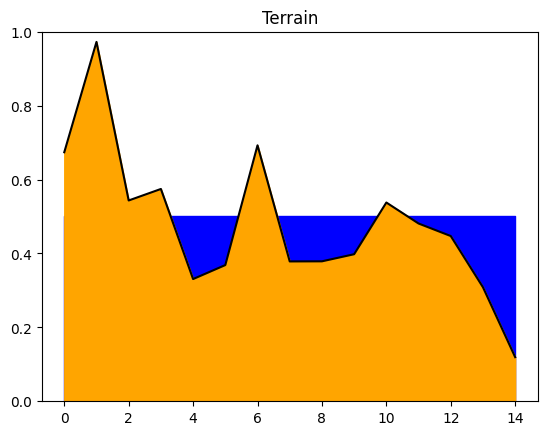

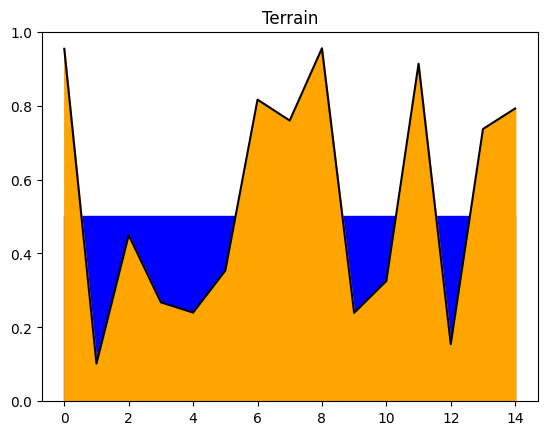

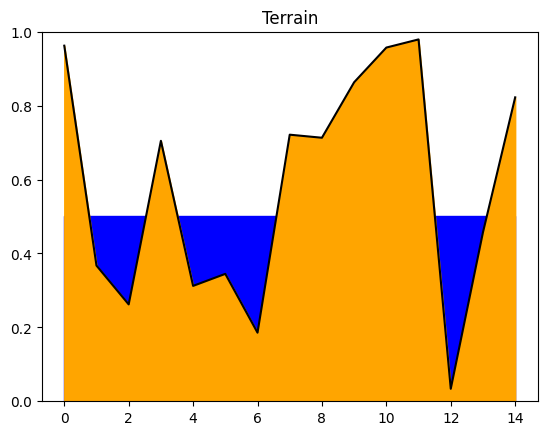

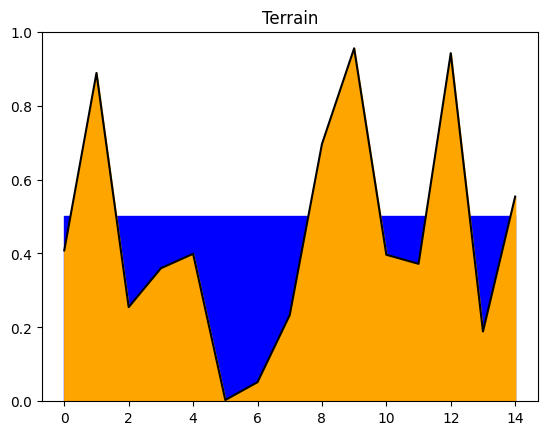

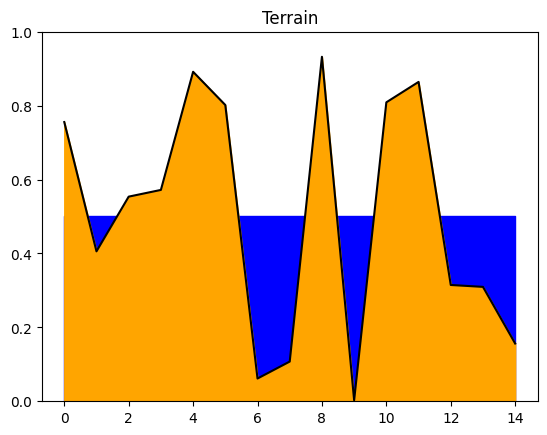

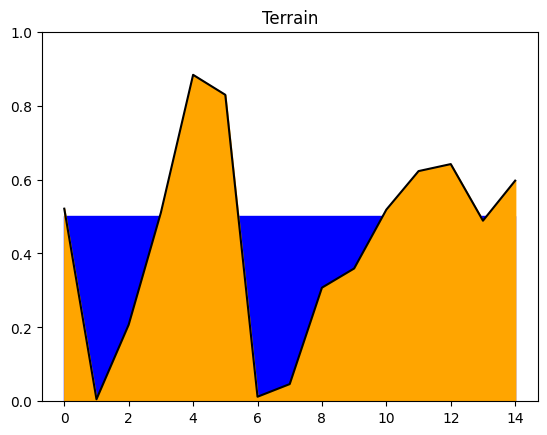

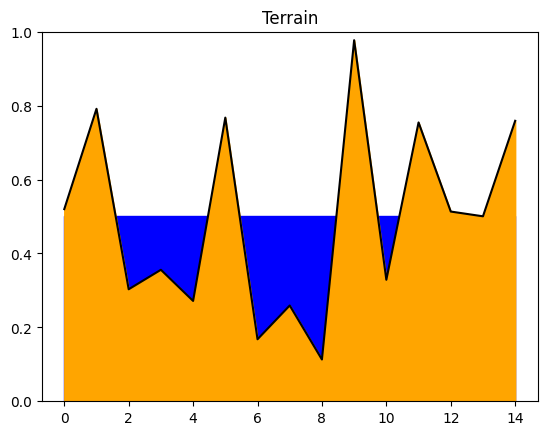

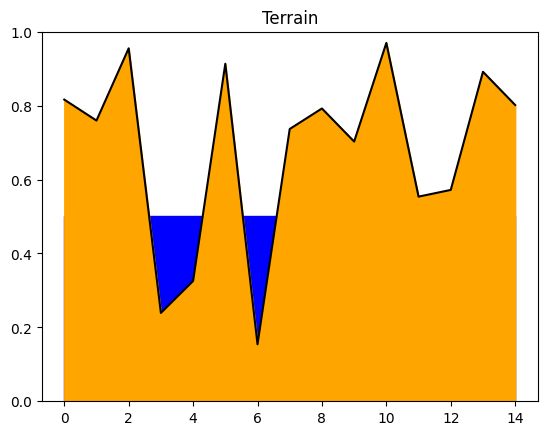

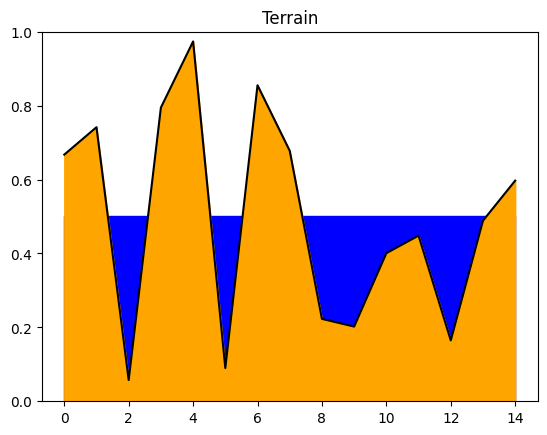

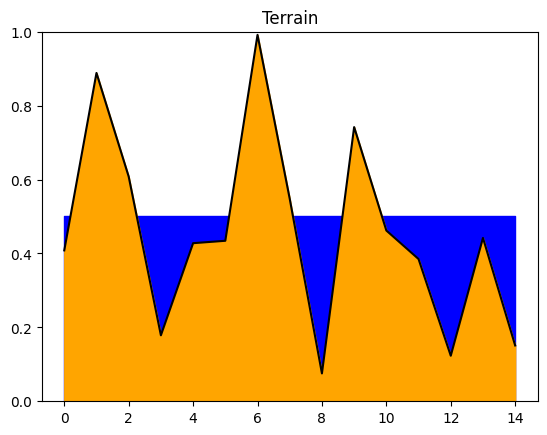

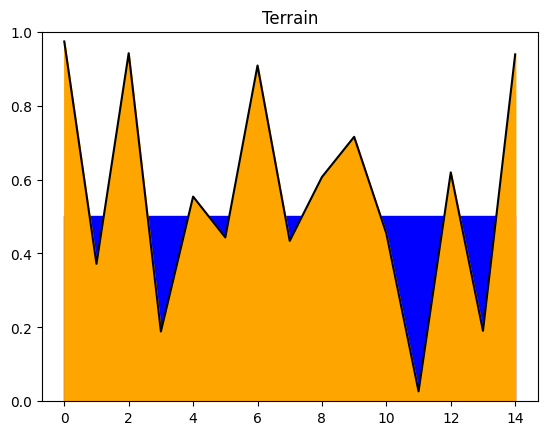

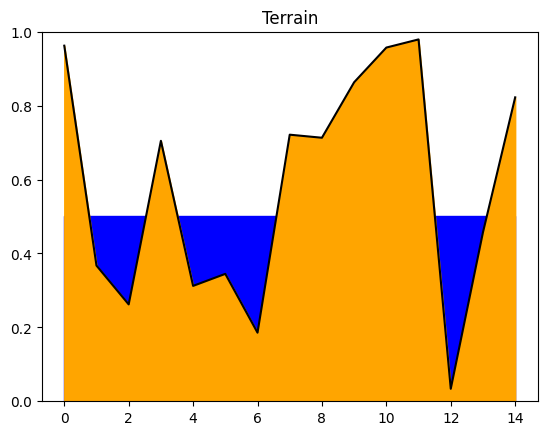

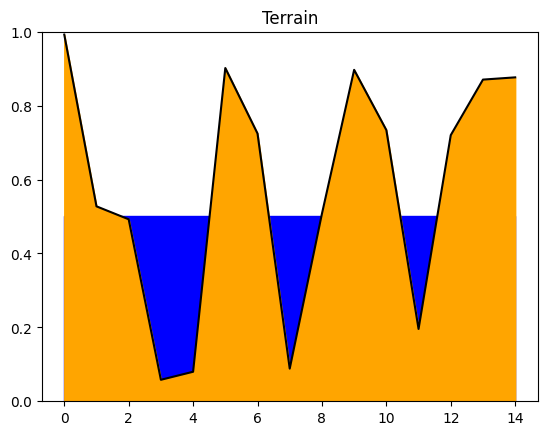

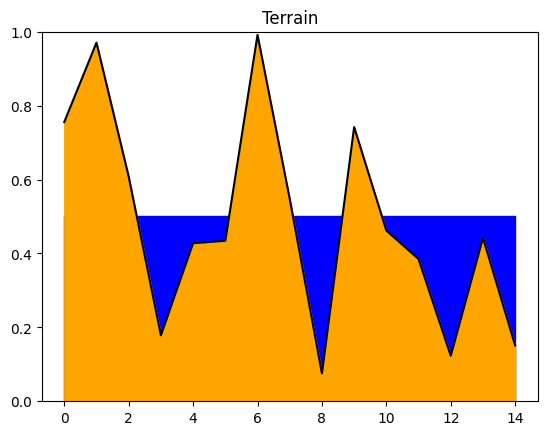

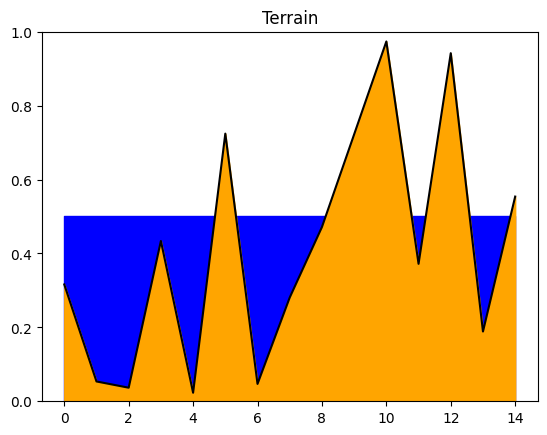

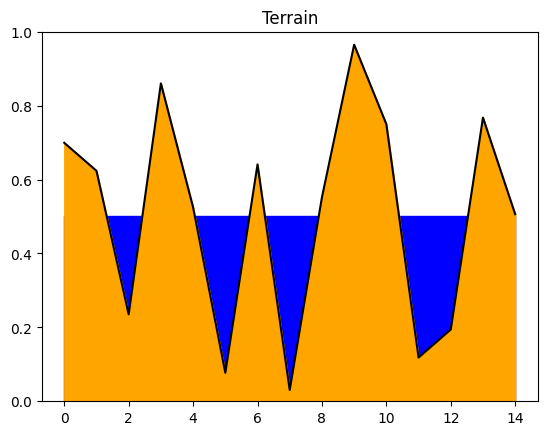

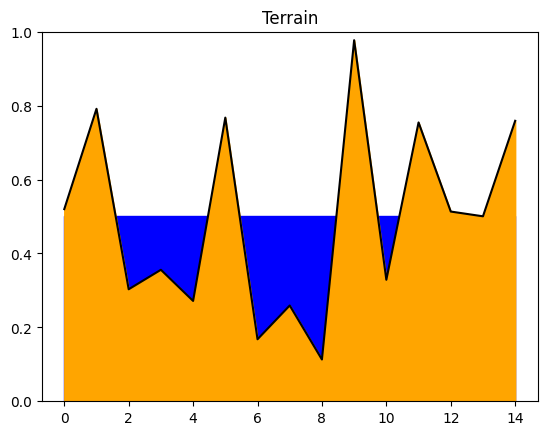

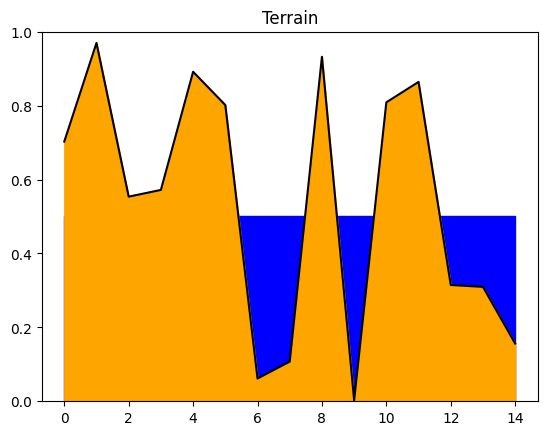

In [18]:
for i in x:
    display_terrain(i)

## Iterované vězňovo dilema

In [17]:
def scores(move1, move2):
    # 1 = betray, 0 = not betray

    scores = (0, 0)

    if (move1 == 1) and (move2 == 1):
        scores = (2, 2)

    if (move1 == 1) and (move2 == 0):
        scores = (0, 3)

    if (move1 == 0) and (move2 == 1):
        scores = (3, 0)

    if (move1 == 0) and (move2 == 0):
        scores = (1, 1)

    return scores

def play(player1_strategy, player2_strategy, num_steps):

    score1 = 0
    score2 = 0

    history1 = []
    history2 = []

    for i in range(num_steps):
        move1 = player1_strategy(history1, history2)
        move2 = player2_strategy(history2, history1)

        s1, s2 = scores(move1, move2)
        score1 += s1
        score2 += s2

        history1.append(move1)
        history2.append(move2)

    return score1, score2


## Special cases

#### initial_betrayal
betraying when playing the first round (no history)

#### cautious_vs_sorry
betraying after successfully getting away with it (3, 0) case

#### insidious_vs_peaceful
betraying after the opponent hasn't betrayed me twice

#### revenge_vs_chance
betraying after being betrayed three times in a row

## Cases based on score
winning significantly, loosing significantly or the average case

In [20]:
def strategy(initial_betrayal, cautious_vs_sorry, insidious_vs_peaceful, revenge_vs_chance, winning, loosing, average):

    def configured_strategy(my_history, opponents_history):
        my_move = 0
        if len(my_history) == 0:
            my_move = initial_betrayal
        elif my_history[-1] == 1 and opponents_history[-1] == 0:
            my_move = cautious_vs_sorry
        elif opponents_history[-2:] == [0, 0]:
            my_move = insidious_vs_peaceful
        elif opponents_history[-3:] == [1, 1, 1]:
            my_move = revenge_vs_chance
        else:
            my_score, opponents_score = tuple(sum(pair) for pair in zip(*[scores(x, y) for x, y in zip(my_history, opponents_history)]))
            if my_score / opponents_score > 1.25:
                my_move = winning
            elif my_score / opponents_score < 0.75:
                my_move = loosing
            else:
                my_move = average      
        return my_move

    return configured_strategy
    

In [ ]:
individual_template = binary_individual(bit_num=7)
population_size = 40
# jak vypočítat fitness??
fitness_function =  three_lake_not_extreme_terrain
maximize = False
selection_function = tournament(batch_size=2)
crossover_function = one_point_crossover
mutation_function = bit_mutation
P_operations = (0.6, 0.3, 0.1)
P_mutation = 0.3
P_crossover = 0.95
number_of_iterations = 100

x = evolution(
    individual_template,
    population_size,
    fitness_function,
    maximize,
    selection_function,
    crossover_function,
    mutation_function,
    P_operations,
    P_mutation,
    P_crossover,
    number_of_iterations
    )

s kým si to má jedinec rozdat, abych ze získaného skóre vypočítal jeho fitness? Aby to mělo výpovědní hodnotu, tak by měli být všechny porovnávány vůči jedné, neměnné strategii.